In [1]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist()
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print("Train size = %i, test_size = %i"%(len(X_train),len(X_test)))

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done
Train size = 14043, test_size = 4681


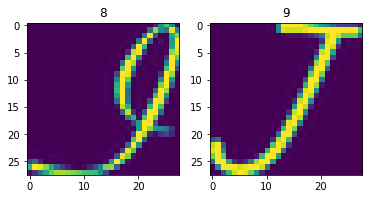

In [2]:
from matplotlib import pyplot as plt

for i in [0,1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_train[i].reshape([28,28]))
    plt.title(str(y_train[i]))

In [3]:
import numpy as np

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# Your turn: create a multiclass classifier in here for notMNIST dataset.

""" 
    >>> As multiclass classifier we are using nn.CrossEntropyLoss.
    >>> When using crossEntropyLoss we dont need to add the LogSoftMax module at the end becasuse CrossEntropyLoss is a combination of LogSoftMax and NNLLLoss.

"""

# create a network that stacks layers on top of each other
import torch
from torch import nn
from torch.nn import Sequential
import torchsummary

model = nn.Sequential()

# add first "dense" layer with 784 input units and 10 output unit. 

model.add_module('l1', nn.Linear(784,400))
model.add_module('a1', nn.Sigmoid())
model.add_module('l4', nn.Linear(400, 200))
model.add_module('a4', nn.Sigmoid())
model.add_module('l5', nn.Linear(200, 30))
model.add_module('a5', nn.Sigmoid())
model.add_module('l6', nn.Linear(30, 10))


In [14]:
torchsummary.summary(model,(784,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
           Sigmoid-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
           Sigmoid-4                  [-1, 200]               0
            Linear-5                   [-1, 30]           6,030
           Sigmoid-6                   [-1, 30]               0
            Linear-7                   [-1, 10]             310
Total params: 400,540
Trainable params: 400,540
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.53
Estimated Total Size (MB): 1.54
----------------------------------------------------------------


In [15]:
# create dummy data with 3 samples and 784 features
x = torch.tensor(X_train[:3], dtype=torch.float32)
y = torch.tensor(y_train[:3], dtype=torch.long)

# compute outputs given inputs, both are variables
y_predicted = model(x)

y_predicted# display what we've got

tensor([[ 0.0503, -0.6044,  0.1002,  0.6027, -0.2816, -0.3346, -0.4323, -0.2080,
         -0.1514, -0.4563],
        [ 0.0534, -0.6040,  0.0990,  0.6022, -0.2802, -0.3349, -0.4299, -0.2075,
         -0.1523, -0.4567],
        [ 0.0530, -0.6057,  0.0931,  0.6061, -0.2790, -0.3357, -0.4343, -0.2068,
         -0.1517, -0.4570]], grad_fn=<AddmmBackward>)

In [16]:
from torch.nn import CrossEntropyLoss, NLLLoss

loss_function =  CrossEntropyLoss()

In [17]:
from torch.optim import Adagrad

optimizer = Adagrad(model.parameters(), lr = 3e-4)

In [18]:
loss = loss_function(y_predicted, y)

In [19]:
loss.backward()

In [20]:
list(model.parameters())[0].grad

tensor([[-1.8253e-05, -1.8253e-05, -1.8253e-05,  ..., -1.8253e-05,
         -1.8253e-05, -1.8253e-05],
        [ 2.1612e-05,  2.1612e-05,  2.1612e-05,  ...,  2.1612e-05,
          2.1612e-05,  2.1612e-05],
        [ 3.5261e-05,  3.5261e-05,  3.5261e-05,  ...,  3.5261e-05,
          3.5261e-05,  3.5261e-05],
        ...,
        [-2.4963e-05, -2.4963e-05, -2.4963e-05,  ..., -2.4963e-05,
         -2.4963e-05, -2.4963e-05],
        [ 9.6493e-05,  9.6493e-05,  9.6493e-05,  ...,  9.6493e-05,
          9.6493e-05,  9.6493e-05],
        [ 9.1299e-06,  9.1299e-06,  9.1299e-06,  ...,  9.1299e-06,
          9.1299e-06,  9.1299e-06]])

In [37]:
x_train_torch = torch.tensor(X_train, dtype=torch.float32)
x_test_torch  = torch.tensor(X_test, dtype = torch.float32)

y_train_torch = torch.tensor(y_train, dtype=torch.long)
y_test_torch  = torch.tensor(y_test, dtype = torch.long)

In [39]:
from sklearn.metrics import accuracy_score

history = []
for i in range(100000):
    
    # sample 128 random observations
    ix = np.random.randint(0, len(X_train), 128)
    x_batch = x_train_torch[ix]

    y_batch = y_train_torch[ix]
    
    y_predicted = model(x_batch)
    loss = loss_function(y_predicted, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    history.append(loss.data.numpy())
    
    if i % 50 == 0:
        print("step #{} | mean loss = {:.5}, test accuracy = {:.5}"
        .format(
                i,
                np.mean(history[-10:]),
                accuracy_score(
                    y_test, 
                    model(
                        x_test_torch
                         ).detach().numpy().argmax(axis=1)
                              )              
                )
              )

00 | mean loss = 0.84726, test accuracy = 0.87374
step #83050 | mean loss = 0.85638, test accuracy = 0.87353
step #83100 | mean loss = 0.82955, test accuracy = 0.87374
step #83150 | mean loss = 0.87449, test accuracy = 0.87353
step #83200 | mean loss = 0.87268, test accuracy = 0.87353
step #83250 | mean loss = 0.8797, test accuracy = 0.87332
step #83300 | mean loss = 0.84997, test accuracy = 0.87332
step #83350 | mean loss = 0.85497, test accuracy = 0.87332
step #83400 | mean loss = 0.86285, test accuracy = 0.87332
step #83450 | mean loss = 0.82755, test accuracy = 0.87353
step #83500 | mean loss = 0.84181, test accuracy = 0.87374
step #83550 | mean loss = 0.86556, test accuracy = 0.87332
step #83600 | mean loss = 0.83636, test accuracy = 0.87332
step #83650 | mean loss = 0.83339, test accuracy = 0.87332
step #83700 | mean loss = 0.87133, test accuracy = 0.8731
step #83750 | mean loss = 0.86852, test accuracy = 0.87374
step #83800 | mean loss = 0.86587, test accuracy = 0.87353
step #83

In [40]:
y_predicted_test = model(x_test_torch).detach().numpy()

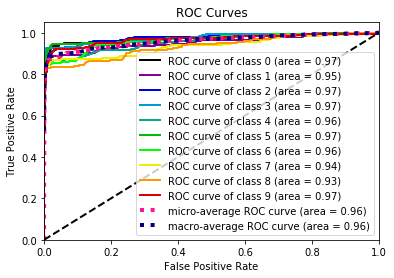

In [43]:
import scikitplot

scikitplot.metrics.plot_roc(y_test, y_predicted_test)